#Install-Import necessary libraries

In [1]:
!pip install swifter

     |████████████████████████████████| 634kB 2.3MB/s 
     |████████████████████████████████| 296kB 19.1MB/s 
     |████████████████████████████████| 583kB 18.3MB/s 
     |████████████████████████████████| 122kB 20.0MB/s 
     |████████████████████████████████| 17.2MB 203kB/s 
     |████████████████████████████████| 48.5MB 136kB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 3.1MB 32.9MB/s 
     |████████████████████████████████| 204kB 40.8MB/s 
     |████████████████████████████████| 1.3MB 30.7MB/s 
     |████████████████████████████████| 133kB 38.0MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 143kB 39.9MB/s 
     |████████████████████████████████| 296kB 35.3MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp37-none-any.whl size=13993 sha256=221e7f74f62b5ee41dbf6c0ff

In [2]:
from datetime import datetime
import swifter
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Load Dataset

In [3]:
listings = pd.read_csv('/content/drive/MyDrive/Code.Hub_Data_Science /Project_Regen/listings.csv')

In [4]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18782 non-null  int64  
 1   listing_url                                   18782 non-null  object 
 2   scrape_id                                     18782 non-null  int64  
 3   last_scraped                                  18782 non-null  object 
 4   name                                          18749 non-null  object 
 5   description                                   18491 non-null  object 
 6   neighborhood_overview                         12451 non-null  object 
 7   picture_url                                   18782 non-null  object 
 8   host_id                                       18782 non-null  int64  
 9   host_url                                      18782 non-null 

## Missing Value Analysis


In [7]:
null_values_percentage = listings.isna().mean()*100
null_values_percentage[null_values_percentage>0]

name                              0.175700
description                       1.549356
neighborhood_overview            33.707805
host_name                         0.298158
host_since                        0.298158
host_location                     0.447237
host_about                       42.460867
host_response_time               67.133426
host_response_rate               67.133426
host_acceptance_rate             44.068789
host_is_superhost                 0.298158
host_thumbnail_url                0.298158
host_picture_url                  0.298158
host_neighbourhood               33.175381
host_listings_count               0.298158
host_total_listings_count         0.298158
host_has_profile_pic              0.298158
host_identity_verified            0.298158
neighbourhood                    33.707805
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bathrooms_text                    0.026621
bedrooms                          5.260356
beds       

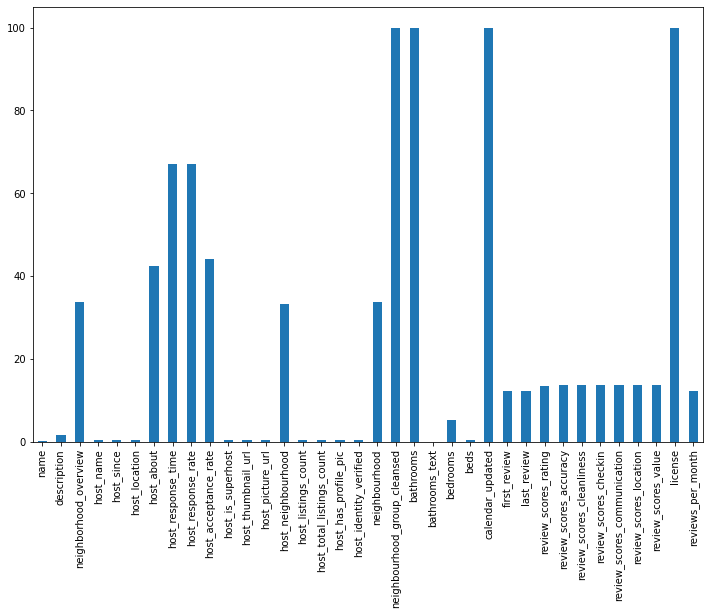

In [8]:
fig = plt.figure(figsize=(12,8))
null_values_percentage[null_values_percentage>0].plot.bar()

# Preprocessing

## Dropping initial unnecessary columns


In [9]:
drop_columns = ['scrape_id',
                'listing_url',
                'name',
                'description',
                'neighborhood_overview',
                'picture_url',
                'host_url',
                'host_id',
                'host_name',
                'host_location',
                'host_about',
                'host_response_time',
                'host_response_rate',
                'host_acceptance_rate',
                'host_thumbnail_url',
                'host_picture_url',
                'host_neighbourhood',
                'host_total_listings_count',
                'host_verifications',
                'host_has_profile_pic',
                'neighbourhood',
                'neighbourhood_group_cleansed',
                'bathrooms',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 
                'maximum_nights_avg_ntm',
                'calendar_updated',
                'calendar_last_scraped',
                'license'
                ]

In [10]:
listings = listings.drop(drop_columns,axis=1)

In [11]:
listings.head(5)

,id,last_scraped,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,2020-10-11,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,t,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.98
1,20168,2020-10-11,2009-12-02,f,2.0,t,Centrum-Oost,52.36424,4.89396,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,t,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.63
2,25428,2020-10-11,2009-11-20,t,2.0,f,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,t,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.15
3,27886,2020-10-10,2010-03-23,t,1.0,t,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$138.00,2,730,t,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,2.05
4,28871,2020-10-10,2010-05-13,t,2.0,t,Centrum-West,52.36719,4.89092,Private room in apartment,Private room,2,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$75.00,2,1825,t,28,56,82,340,336,32,2,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.72


In [12]:
listings.shape

(18782, 42)

In [13]:
listings.columns

Index(['id', 'last_scraped', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_

## Cleaning Every Column, Treat  Null Values

**last_scraped**

In [14]:
listings['last_scraped'] = pd.to_datetime(listings['last_scraped']) # date type the date

In [15]:
listings['last_scraped'].isna().sum()

0

**Host Since**

In [16]:
listings['host_since']

0        2008-09-24
1        2009-12-02
2        2009-11-20
3        2010-03-23
4        2010-05-13
            ...    
18777    2019-11-20
18778    2011-08-12
18779    2015-11-04
18780    2016-06-01
18781    2020-10-08
Name: host_since, Length: 18782, dtype: object

In [17]:
listings['host_since'] = pd.to_datetime(listings['host_since']) # date type the date

In [18]:
listings['host_since']

0       2008-09-24
1       2009-12-02
2       2009-11-20
3       2010-03-23
4       2010-05-13
           ...    
18777   2019-11-20
18778   2011-08-12
18779   2015-11-04
18780   2016-06-01
18781   2020-10-08
Name: host_since, Length: 18782, dtype: datetime64[ns]

In [19]:
listings['host_active_for'] = (listings['last_scraped'] - listings['host_since']).astype('timedelta64[D]') # substruct host_since date by last_scraped date

In [20]:
listings['host_active_for'].isna().sum()

56

In [21]:
listings.rename({'host_active_for': 'host_active_for(days)'}, axis=1, inplace=True) # rename the column

In [22]:
listings['host_active_for(days)'].isna().sum()

56

In [23]:
listings['host_active_for(days)'] = listings['host_active_for(days)'].fillna(listings['host_active_for(days)'].median()) # fill the Nan value with column's median

In [24]:
listings['host_active_for(days)'].isna().sum()

0

In [25]:
listings.drop('host_since',axis=1,inplace=True) # drop the colum

**host_is_superhost/ host_identity_verified** 

In [26]:
listings.replace({'f': 0, 't': 1}, inplace=True) # if f then 0 else if t then 1

In [27]:
for i in ['host_is_superhost', 'host_identity_verified']:
  print('The missing values of column {} are: {}'.format(i,listings[i].isna().sum()))

The missing values of column host_is_superhost are: 56
The missing values of column host_identity_verified are: 56


In [28]:
listings[listings['host_listings_count'].isna()].head(56) 

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days)
226,571029,2020-10-10,NaN,NaN,NaN,De Baarsjes - Oud-West,52.36840,4.86064,Entire apartment,Entire home/apt,4,1 bath,2.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$150.00,3,1124,1,0,0,0,0,10,0,0,2012-08-13,2018-05-27,98.0,10.0,9.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.10,2051.0
746,1364081,2020-10-11,NaN,NaN,NaN,Oostelijk Havengebied - Indische Buurt,52.36304,4.93673,Entire apartment,Entire home/apt,3,1 bath,1.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$135.00,3,1124,1,0,0,0,0,56,0,0,2013-08-31,2018-08-27,88.0,9.0,8.0,9.0,9.0,9.0,9.0,0,52,52,0,0,0.65,2051.0
966,1849795,2020-10-11,NaN,NaN,NaN,Centrum-West,52.37375,4.87929,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$126.00,3,1125,1,0,0,0,0,39,0,0,2013-11-03,2018-12-16,91.0,9.0,9.0,10.0,9.0,10.0,9.0,0,52,52,0,0,0.46,2051.0
1496,3159545,2020-10-13,NaN,NaN,NaN,De Pijp - Rivierenbuurt,52.35580,4.89884,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Essentials"", ""Iron"", ""Carbon monoxide alarm""...",$125.00,3,1125,1,0,0,0,0,12,0,0,2015-10-19,2018-10-22,96.0,10.0,9.0,10.0,10.0,10.0,10.0,0,52,52,0,0,0.20,2051.0
1815,3781081,2020-10-10,NaN,NaN,NaN,Oostelijk Havengebied - Indische Buurt,52.36417,4.94328,Entire apartment,Entire home/apt,4,1 bath,3.0,2.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$150.00,3,1125,1,0,0,0,0,5,0,0,2015-07-20,2018-07-26,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,52,52,0,0,0.08,2051.0
2167,4609694,2020-10-10,NaN,NaN,NaN,Centrum-Oost,52.37220,4.93064,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Wifi...",$139.00,4,1125,1,0,0,0,0,25,0,0,2014-12-28,2019-01-07,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.35,2051.0
2652,5879421,2020-10-11,NaN,NaN,NaN,De Pijp - Rivierenbuurt,52.35501,4.89389,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,3,1125,1,0,0,0,0,32,0,0,2015-04-20,2018-09-15,95.0,10.0,10.0,9.0,10.0,10.0,9.0,0,52,52,0,0,0.48,2051.0
2901,6345018,2020-10-13,NaN,NaN,NaN,Centrum-Oost,52.36872,4.92736,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Essentials"", ""Carbon monoxide alarm"", ""Shamp...",$60.00,3,10,1,0,0,0,0,20,0,0,2015-05-26,2016-02-07,92.0,10.0,9.0,10.0,9.0,9.0,9.0,0,1,1,0,0,0.30,2051.0
3532,7492962,2020-10-10,NaN,NaN,NaN,Centrum-Oost,52.35946,4.89304,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$175.00,3,1124,1,0,0,0,0,12,0,0,2015-07-31,2018-09-03,90.0,9.0,10.0,10.0,10.0,10.0,8.0,0,52,52,0,0,0.19,2051.0
3962,8404826,2020-10-10,NaN,NaN,NaN,De Baarsjes - Oud-West,52.36982,4.85983,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Kitchen"",...",$120.00,4,1124,1,0,0,0,0,9,0,0,2015-11-18,2018-07-03,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0,52,52,0,0,0.15,2051.0


In [29]:
listings[listings['host_identity_verified'].isna()].shape

(56, 42)

In [30]:
for i in ['host_is_superhost', 'host_identity_verified']:
   listings[i].fillna(value=0,inplace=True) # assuming that Nan means false and fill the Nan values
listings[['host_identity_verified','host_is_superhost']].isna().sum()

host_identity_verified    0
host_is_superhost         0
dtype: int64

**Neighbourhood-Cleansed**


In [31]:
listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    3185
De Pijp - Rivierenbuurt                   2353
Centrum-West                              2028
Centrum-Oost                              1625
Westerpark                                1421
Zuid                                      1332
Oud-Oost                                  1233
Bos en Lommer                             1069
Oostelijk Havengebied - Indische Buurt     905
Oud-Noord                                  594
Watergraafsmeer                            523
IJburg - Zeeburgereiland                   448
Slotervaart                                392
Noord-West                                 383
Noord-Oost                                 267
Buitenveldert - Zuidas                     233
Geuzenveld - Slotermeer                    213
Osdorp                                     128
De Aker - Nieuw Sloten                     126
Gaasperdam - Driemond                      120
Bijlmer-Centrum                            105
Bijlmer-Oost 

In [32]:
suburbs_list = ['Noord-West','Noord-Oost','Centrum-West','Centrum-Oost','Bijlmer-Centrum','Bijlmer-Oost','Oud-Noord','Oud-Oost']
for sub in suburbs_list:
  listings.loc[listings.neighbourhood_cleansed == sub,'neighbourhood_cleansed'] = sub.split('-')[0] 

In [33]:
listings['neighbourhood_cleansed'].value_counts()

Centrum                                   3653
De Baarsjes - Oud-West                    3185
De Pijp - Rivierenbuurt                   2353
Oud                                       1827
Westerpark                                1421
Zuid                                      1332
Bos en Lommer                             1069
Oostelijk Havengebied - Indische Buurt     905
Noord                                      650
Watergraafsmeer                            523
IJburg - Zeeburgereiland                   448
Slotervaart                                392
Buitenveldert - Zuidas                     233
Geuzenveld - Slotermeer                    213
Bijlmer                                    204
Osdorp                                     128
De Aker - Nieuw Sloten                     126
Gaasperdam - Driemond                      120
Name: neighbourhood_cleansed, dtype: int64

In [34]:
listings['neighbourhood_cleansed'].isna().sum()

0

**property type**

In [35]:
listings['property_type'].unique()

array(['Private room in apartment', 'Private room in townhouse',
       'Entire apartment', 'Private room in houseboat',
       'Entire guest suite', 'Boat', 'Entire townhouse',
       'Private room in bed and breakfast', 'Private room in guesthouse',
       'Private room in guest suite', 'Entire loft', 'Houseboat',
       'Room in bed and breakfast', 'Private room in house',
       'Entire guesthouse', 'Private room in boat', 'Entire condominium',
       'Private room in loft', 'Entire house', 'Entire villa',
       'Private room in condominium', 'Entire serviced apartment',
       'Shared room in camper/rv', 'Private room',
       'Private room in farm stay', 'Shared room in houseboat',
       'Entire chalet', 'Shared room in apartment', 'Entire bungalow',
       'Private room in tiny house', 'Private room in island',
       'Entire bed and breakfast', 'Entire cabin',
       'Room in boutique hotel', 'Shared room in loft',
       'Shared room in boat', 'Lighthouse', 'Private room in 

In [36]:
listings['property_type'].isna().sum()

0

In [37]:
listings['property_type'].value_counts()

Entire apartment                      11751
Private room in apartment              2311
Entire house                           1208
Entire townhouse                        473
Private room in house                   349
Private room in bed and breakfast       335
Entire loft                             277
Entire condominium                      256
Boat                                    212
Houseboat                               204
Private room in townhouse               176
Entire serviced apartment               142
Private room in houseboat               120
Room in boutique hotel                  114
Private room in guest suite             111
Private room in boat                    100
Private room in condominium              84
Room in hotel                            74
Private room in loft                     63
Room in bed and breakfast                59
Shared room in apartment                 33
Entire guest suite                       31
Entire villa                    

In [38]:
#creating a mapper in order to decline the many different kinds of property's values 
property_mapper = {'Private room in apartment': 'apartment',
                   'Private room in townhouse': 'house',
                   'Entire apartment': 'apartment',
                   'Private room in houseboat':'boat',
                   'Entire guest suite':'suite',
                   'Boat':'boat',
                   'Entire townhouse':'house',
                   'Private room in bed and breakfast':'bed and breakfast',
                   'Private room in guesthouse':'house',
                   'Private room in guest suite':'suite',
                   'Entire loft':'loft',
                   'Houseboat':'boat',
                   'Room in bed and breakfast':'bed and breakfast',
                   'Private room in house':'house',
                   'Entire guesthouse':'house',
                   'Private room in boat':'boat',
                   'Entire condominium':'condominium',
                   'Private room in loft':'loft',
                   'Entire house':'house',
                   'Entire villa':'villa',
                   'Private room in condominium':'condominium',
                   'Entire serviced apartment':'apartment',
                   'Shared room in camper/rv':'unique',
                   'Private room':'house',
                   'Private room in farm stay':'unique',
                   'Shared room in houseboat':'boat',
                   'Entire chalet':'unique',
                   'Shared room in apartment':'apartment',
                   'Entire bungalow':'unique',
                   'Private room in tiny house':'unique',
                   'Private room in island':'unique',
                   'Entire bed and breakfast':'bed and breakfast',
                   'Entire cabin':'unique',
                   'Room in boutique hotel':'hotel',
                   'Shared room in loft':'loft',
                   'Shared room in boat':'boat',
                   'Lighthouse':'unique',
                   'Private room in cabin':'unique',
                   'Shared room in bed and breakfast':'bed and breakfast',
                   'Private room in villa':'villa',
                   'Barn':'unique',
                   'Room in serviced apartment':'apartment',
                   'Private room in bungalow':'unique',
                   'Room in hotel':'hotel',
                   'Entire cottage':'unique',
                   'Entire place':'house',
                   'Tiny house':'unique',
                   'Entire floor':'house',
                   'Private room in floor':'house',
                   'Private room in dome house':'unique',
                   'Shared room in house':'house',
                   'Earth house':'unique',
                   'Entire home/apt':'apartment',
                   'Shared room in hostel': 'hostel',
                   'Private room in camper/rv':'unique',
                   'Room in casa particular':'unique',
                   'Campsite':'unique',
                   'Room in hostel':'hostel',
                   'Private room in hostel':'hostel',
                   'Room in aparthotel':'hotel',
                   'Private room in serviced apartment':'apartment',
                   'Yurt':'unique',
                   'Bus':'unique',
                   'Tipi':'unique',
                   'Private room in earth house':'unique',
                   'Camper/RV':'unique',
                   'Cave': 'unique'
}

In [39]:
listings['property_encoded'] = listings['property_type'].map(property_mapper) # we apply the mapper to the column

In [40]:
listings['property_encoded'].value_counts() 

apartment            14275
house                 2271
boat                   643
bed and breakfast      399
loft                   342
condominium            340
hotel                  200
suite                  142
unique                  74
hostel                  58
villa                   38
Name: property_encoded, dtype: int64

In [41]:
listings['property_encoded'].shape

(18782,)

In [42]:
listings['room_type'].value_counts()

Entire home/apt    14664
Private room        3922
Hotel room           134
Shared room           62
Name: room_type, dtype: int64

In [43]:
listings['room_type'].isna().sum()

0

**Accommodates**

In [44]:
listings['accommodates'].unique()

array([ 2,  3,  1,  4,  6,  5, 12, 16,  7,  9, 10,  8, 14, 13])

In [45]:
listings['accommodates'].isna().sum()

0

**Bathrooms**

In [46]:
listings['bathrooms_text'].dtype

dtype('O')

In [47]:
listings['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', '2 baths', nan, '2.5 baths', '3 baths', '0 baths',
       'Private half-bath', '3.5 baths', '0 shared baths',
       '4 shared baths', 'Shared half-bath', 'Half-bath',
       '2 shared baths', '4 baths', '3 shared baths', '2.5 shared baths',
       '6 baths', '8 baths', '5 baths', '3.5 shared baths', '4.5 baths',
       '5.5 baths', '13 baths'], dtype=object)

In [48]:
listings['bathrooms_text'].isna().sum()

5

In [49]:
listings['bathrooms_text'].value_counts()

1 bath               10986
1.5 baths             3532
1 shared bath         1251
1 private bath        1079
2 baths                823
1.5 shared baths       494
2.5 baths              248
3 baths                101
3.5 baths               44
Half-bath               42
0 baths                 38
Shared half-bath        32
2 shared baths          30
0 shared baths          13
4 baths                 13
3 shared baths          10
2.5 shared baths         9
3.5 shared baths         8
Private half-bath        7
4 shared baths           5
4.5 baths                4
5 baths                  3
6 baths                  2
13 baths                 1
5.5 baths                1
8 baths                  1
Name: bathrooms_text, dtype: int64

In [50]:
listings[listings['bathrooms_text']=='2 baths']['property_type'].value_counts() # how many 2 baths listings for each different property type

Entire apartment                      376
Entire house                          206
Entire townhouse                       97
Private room in apartment              28
Houseboat                              26
Entire loft                            17
Boat                                   13
Private room in house                   8
Entire serviced apartment               7
Private room in bed and breakfast       7
Entire villa                            7
Entire condominium                      7
Private room in guest suite             4
Private room in townhouse               3
Private room in serviced apartment      3
Entire place                            2
Barn                                    2
Private room in houseboat               2
Private room in condominium             2
Room in hotel                           1
Room in boutique hotel                  1
Private room in boat                    1
Room in bed and breakfast               1
Private room                      

In [51]:
bathrooms_number_mapper = {'1.5 shared baths':1.5,
                    '1 private bath':1,
                    '1 bath':1,
                    '1.5 baths':1.5,
                    '1 shared bath':1,
                    '2 baths':2,
                     np.nan:np.nan,
                    '2.5 baths':2.5,
                    '3 baths':3,
                    '0 baths':0,
                    'Private half-bath':np.nan,
                    '3.5 baths':3.5,
                    '0 shared baths':0,
                    '4 shared baths':4,
                    'Shared half-bath':1,
                    'Half-bath':1,
                    '2 shared baths':2,
                    '4 baths':4,
                    '3 shared baths':3,
                    '2.5 shared baths':2.5,
                    '6 baths':6,
                    '8 baths':8,
                    '5 baths':5,
                    '3.5 shared baths':3.5,
                    '4.5 baths':4.5,
                    '5.5 baths':5.5,
                    '13 baths':13
}

In [52]:
listings[listings['bathrooms_text']=='6 baths']['property_type'].value_counts()

Boat    2
Name: property_type, dtype: int64

In [53]:
bathrooms_type_mapper = {'1.5 shared baths':'shared',
                    '1 private bath':'private',
                    '1 bath':'private',
                    '1.5 baths':'private',
                    '1 shared bath':'shared',
                    '2 baths':'private',
                     np.nan:'private',
                    '2.5 baths':'private',
                    '3 baths':'private',
                    '0 baths':'private',
                    'Private half-bath':'private',
                    '3.5 baths':'private',
                    '0 shared baths':'shared',
                    '4 shared baths':'shared',
                    'Shared half-bath':'shared',
                    'Half-bath':'shared',
                    '2 shared baths':'shared',
                    '4 baths':'private',
                    '3 shared baths':'shared',
                    '2.5 shared baths':'shared',
                    '6 baths':'private',
                    '8 baths':'private',
                    '5 baths':'private',
                    '3.5 shared baths':'shared',
                    '4.5 baths':'private',
                    '5.5 baths':'private',
                    '13 baths':'private'
}

In [54]:
listings['bathrooms_number'] = listings['bathrooms_text'].map(bathrooms_number_mapper)

In [55]:
listings['bathrooms_type'] = listings['bathrooms_text'].map(bathrooms_type_mapper)

In [56]:
listings.drop('bathrooms_text',axis=1,inplace=True)

In [57]:
listings[['bathrooms_type','bathrooms_number']].isna().sum()

bathrooms_type       0
bathrooms_number    12
dtype: int64

In [58]:
listings['bathrooms_number'].value_counts()

1.0     13390
1.5      4026
2.0       853
2.5       257
3.0       111
3.5        52
0.0        51
4.0        18
4.5         4
5.0         3
6.0         2
5.5         1
13.0        1
8.0         1
Name: bathrooms_number, dtype: int64

In [59]:
listings['bathrooms_number'].fillna(inplace=True,value=1.0)
listings['bathrooms_number'].isna().sum()

0

In [60]:
listings['bathrooms_number'].value_counts()

1.0     13402
1.5      4026
2.0       853
2.5       257
3.0       111
3.5        52
0.0        51
4.0        18
4.5         4
5.0         3
6.0         2
5.5         1
13.0        1
8.0         1
Name: bathrooms_number, dtype: int64

**Amenities**

In [61]:
"""
The content of column amenities is a list of strings. Which when we call, comes with the shape of '["",""]' but also with some gaps.
So we transform the input value by replacing (',[,],"") and splitting at ,. and create a list of strings
"""
def amenities_kinds(s): 
  
  l1 = s.replace("'",'').replace("[",'').replace("]",'').replace('"','').split(',')
  l2 = [x.strip() for x in l1]
  
  return l2

In [62]:
listings['amenities'] = listings['amenities'].swifter.apply(amenities_kinds)

In [63]:
df = listings['amenities'].swifter.apply(pd.Series) # create a new DataFrame by all diffrent amenities as different columns of each listing_id in rows

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,Laptop-friendly workspace,Coffee maker,Carbon monoxide alarm,Fire extinguisher,Host greets you,Garden or backyard,Hangers,First aid kit,Heating,Single level home,Shampoo,Private entrance,Washer,Extra pillows and blankets,Hot water,Smoke alarm,Paid parking off premises,Essentials,Ethernet connection,Paid parking on premises,Hair dryer,Wifi,Iron,Bed linens,Refrigerator,Lock on bedroom door,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Laptop-friendly workspace,TV,Carbon monoxide alarm,Long term stays allowed,Wifi,Hangers,Essentials,Heating,Smoke alarm,Bed linens,Refrigerator,Free street parking,Fire extinguisher,Hot water,Hair dryer,Host greets you,Paid parking off premises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Laptop-friendly workspace,Kitchen,Dishwasher,Coffee maker,Stove,Cable TV,Fire extinguisher,TV,Elevator,Hangers,Heating,Shampoo,Dryer,Washer,Hot water,Extra pillows and blankets,Smoke alarm,Essentials,Microwave,Indoor fireplace,Hair dryer,Long term stays allowed,Cooking basics,Iron,Wifi,Dishes and silverware,Oven,Bed linens,Refrigerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Laptop-friendly workspace,Coffee maker,Breakfast,Carbon monoxide alarm,Fire extinguisher,TV,Private living room,Hangers,Heating,Luggage dropoff allowed,Shampoo,Patio or balcony,Private entrance,Hot water,Smoke alarm,Smart lock,Essentials,Hair dryer,Waterfront,Long term stays allowed,Wifi,Dishes and silverware,Lake access,Refrigerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Carbon monoxide alarm,Private entrance,Wifi,Hangers,Essentials,Heating,Lock on bedroom door,Shampoo,Dryer,Smoke alarm,Refrigerator,Fire extinguisher,Hot water,Hair dryer,Host greets you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       18782 non-null  object
 1   1       18718 non-null  object
 2   2       18698 non-null  object
 3   3       18677 non-null  object
 4   4       18614 non-null  object
 5   5       18478 non-null  object
 6   6       18204 non-null  object
 7   7       17828 non-null  object
 8   8       17264 non-null  object
 9   9       16544 non-null  object
 10  10      15664 non-null  object
 11  11      14672 non-null  object
 12  12      13659 non-null  object
 13  13      12647 non-null  object
 14  14      11651 non-null  object
 15  15      10716 non-null  object
 16  16      9942 non-null   object
 17  17      9206 non-null   object
 18  18      8615 non-null   object
 19  19      8025 non-null   object
 20  20      7471 non-null   object
 21  21      6895 non-null   object
 22  22      6328 non-null 

In [66]:
def to_1D(series): # function for transforming the 2D input to 1D
 return pd.Series([x for lst in series for x in lst])

In [67]:
to_1D(listings['amenities']).value_counts()

Wifi                                                                                                  18338
Heating                                                                                               18137
Essentials                                                                                            18097
Kitchen                                                                                               16714
Smoke alarm                                                                                           15093
TV                                                                                                    14406
Washer                                                                                                14160
Hangers                                                                                               13437
Iron                                                                                                  12682
Laptop-friendly workspace   

In [68]:
to_1D(listings['amenities']).unique()

array(['Laptop-friendly workspace', 'Coffee maker',
       'Carbon monoxide alarm', 'Fire extinguisher', 'Host greets you',
       'Garden or backyard', 'Hangers', 'First aid kit', 'Heating',
       'Single level home', 'Shampoo', 'Private entrance', 'Washer',
       'Extra pillows and blankets', 'Hot water', 'Smoke alarm',
       'Paid parking off premises', 'Essentials', 'Ethernet connection',
       'Paid parking on premises', 'Hair dryer', 'Wifi', 'Iron',
       'Bed linens', 'Refrigerator', 'Lock on bedroom door', 'TV',
       'Long term stays allowed', 'Free street parking', 'Kitchen',
       'Dishwasher', 'Stove', 'Cable TV', 'Elevator', 'Dryer',
       'Microwave', 'Indoor fireplace', 'Cooking basics',
       'Dishes and silverware', 'Oven', 'Breakfast',
       'Private living room', 'Luggage dropoff allowed',
       'Patio or balcony', 'Smart lock', 'Waterfront', 'Lake access',
       'Shower gel', 'Keypad', 'Freezer', 'Crib', 'Laundromat nearby',
       'Sound system', 'Nespr

In [69]:
for val in to_1D(listings['amenities']).unique():
  print(val)

Laptop-friendly workspace
Coffee maker
Carbon monoxide alarm
Fire extinguisher
Host greets you
Garden or backyard
Hangers
First aid kit
Heating
Single level home
Shampoo
Private entrance
Washer
Extra pillows and blankets
Hot water
Smoke alarm
Paid parking off premises
Essentials
Ethernet connection
Paid parking on premises
Hair dryer
Wifi
Iron
Bed linens
Refrigerator
Lock on bedroom door
TV
Long term stays allowed
Free street parking
Kitchen
Dishwasher
Stove
Cable TV
Elevator
Dryer
Microwave
Indoor fireplace
Cooking basics
Dishes and silverware
Oven
Breakfast
Private living room
Luggage dropoff allowed
Patio or balcony
Smart lock
Waterfront
Lake access
Shower gel
Keypad
Freezer
Crib
Laundromat nearby
Sound system
Nespresso machine
Portable fans
Lockbox
High chair
EV charger
Pack \u2019n Play/travel crib
Dryer \u2013 In building
Bosch refrigerator
Children\u2019s dinnerware
Marie Stella Maris body soap
Bathtub
Paid street parking off premises
Washer \u2013\u00a0In building
Central heati

In [70]:
to_1D(listings['amenities']).nunique()

230

In [71]:
superlist = ['Laptop-friendly workspace',
             'Coffee maker',
       'Carbon monoxide alarm', 'Fire extinguisher', 'Host greets you',
       'Garden or backyard', 'Hangers', 'First aid kit', 'Heating',
       'Single level home', 'Shampoo', 'Private entrance', 'Washer',
       'Extra pillows and blankets', 'Hot water', 'Smoke alarm',
       'Parking', 'Essentials', 'Ethernet connection',
       'Hair dryer', 'Wifi', 'Iron',
       'Bed linens', 'Refrigerator', 'Lock on bedroom door', 'TV',
       'Long term stays allowed', 'Parking', 'Kitchen',
       'Dishwasher', 'Stove', 'Cable TV', 'Elevator', 'Dryer',
       'Microwave', 'Indoor fireplace', 'Cooking basics',
       'Dishes and silverware', 'Oven', 'Breakfast',
       'Private living room', 'Luggage dropoff allowed',
       'Patio or balcony', 'Smart lock', 'Waterfront', 'Lake access',
       'Shower gel', 'Keypad', 'Freezer', 'Crib', 'Laundromat nearby',
       'Sound system', 'Nespresso machine', 'Portable fans', 'Lockbox',
       'High chair', 'EV charger', 'Pack \\u2019n Play/travel crib',
       'Dryer \\u2013 In building', 'Bosch refrigerator',
       'Children\\u2019s dinnerware', 'Marie Stella Maris body soap',
       'Bathtub', 'Paid street parking off premises',
       'Washer \\u2013\\u00a0In building', 'Central heating',
       'Children\\u2019s books and toys', 'TV with Chromecast',
       'Marie Stella Maris conditioner', 'Marie Stella Maris shampoo',
       'Babysitter recommendations', 'Wifi \\u2013 250 Mbps',
       'Room-darkening shades', 'Pocket wifi', 'Air conditioning',
       'Window guards', 'Cleaning before checkout', 'BBQ grill',
       'Hot tub', 'Free parking on premises', 'Outlet covers', 'Gym',
       'Baby monitor', 'Fireplace guards', 'Stair gates',
       'Changing table', 'Game console', 'Baby bath', 'Building staff',
       'Pool', 'Paid parking lot off premises', 'Baking sheet',
       'Barbecue utensils', 'Bread maker', 'Table corner guards',
       'Body soap', 'Beach essentials', 'Record player', 'Mini fridge',
       'Conditioner', 'TV with Netflix', 'Portable air conditioning',
       'Beachfront', 'Pour Over Coffee', 'Stainless steel oven',
       'HDTV with Chromecast', 'standard cable',
       'Dryer \\u2013\\u00a0In unit', 'Washer \\u2013\\u00a0In unit', '',
       'Paid parking garage off premises', 'Piano', 'Rice Maker',
       'Bluetooth sound system', 'LG refrigerator',
       'Marie Stella Maris luxury brand shampoo',
       'Retro stereo with Digitial radio', 'CD',
       'bluetooth connection for you to connect your Spotify sound system with Bluetooth and aux',
       'Hotel chef oven stainless steel oven',
       'Extra large chef stove with 6 burners stainless steel gas stove',
       'Marie Stella Maris luxury brand conditioner',
       'Marie Stella Maris luxury brand body soap', 'LUX body soap',
       'n.vt. conditioner',
       'Paid parking lot on premises \\u2013 10 spaces',
       'DENON - BOSE sound system', 'ATAG oven',
       'unicura or dettol body soap', 'Unicura body soap',
       'Stainless steel gas stove', 'Sonos sound system',
       'Luggage store possible ( small fee)// * I wash your dishes. Enjoy holiday!//* My fridge in kitchen',
       'to use for guest.  refrigerator', 'Gas stove',
       'Wifi \\u2013 20 Mbps', 'Wifi \\u2013 39 Mbps',
       'Paid parking lot on premises', '42\\ HDTV with Netflix',
       'Amazon Prime Video', 'Philips SoundBar sound system with aux',
       '50\\ HDTV with Chromecast',
       'Yamaha sound system with Bluetooth and aux',
       'QUAD 33/303 - Diapason Micra - Macbook+Spotify Pro sound system with Bluetooth and aux',
       'Ski-in/Ski-out', 'SONOS sound system', 'Trash compactor',
       'Ceiling fan', 'Bose sound system with aux', '??? conditioner',
       'BlueNode & B&W sound system with Bluetooth and aux',
       'HDTV with Netflix', 'premium cable',
       'Sonos Bluetooth sound system',
       'Free carport on premises \\u2013 1 space', 'Electric stove',
       'Etos conditioner', 'Etos body soap',
       'JBL Speakers Bluetooth sound system', 'Sound system with aux',
       'bosh oven', 'jbl Bluetooth sound system', 'Aveda shampoo',
       'Aveda body soap', 'Aveda conditioner',
       'Free parking on premises \\u2013 1 space', 'Rituals', 'Dove',
       'Nivea body soap', 'LOreal', 'or Andrelon or Guhl shampoo',
       'lOreal or Andrelon or Guhl conditioner',
       'Boretti stainless steel gas stove',
       'Boretti stainless steel oven', 'Induction stove',
       'BluNode & B&W sound system with Bluetooth and aux',
       'Rituals conditioner', 'Rituals shampoo', 'Rituals body soap',
       'Central air conditioning', 'LOreal shampoo', 'LOreal conditioner',
       'Dettol body soap', 'dove body soap',
       'Dove or Baby shampoo shampoo', 'Dove body soap',
       'Samsung American Fridge refrigerator', 'Bosch oven',
       'Marie-Stella-Maris body soap', 'Bosch induction stove',
       'Portable heater', 'Dove or Palmolive body soap',
       'Marie-Stella-Maris shampoo',
       'A\\u0113sop & Marie-Stella-Maris body soap',
       'SMEG stainless steel induction stove',
       'Paid parking garage on premises \\u2013 1 space',
       'Sonos speaker sound system', 'Ikea induction stove',
       'Google Bluetooth sound system', 'Ikea stainless steel oven',
       'Electrolux refrigerator', 'AH conditioner', 'AH body soap',
       'House brand body soap', 'Sound system with Bluetooth and aux',
       'Paid parking garage on premises \\u2013 60 spaces',
       'Paid parking garage on premises',
       'bose sound system with Bluetooth and aux',
       'spa collection conditioner', 'spa collection body soap',
       'UE Boom Speaker Bluetooth sound system', 'bio body soap',
       'Siemens stainless steel oven', 'Smeg refrigerator',
       'Smeg stainless steel gas stove', 'siemens refrigerator',
       'gaggenau stainless steel oven', 'bora induction stove',
       'Free driveway parking on premises \\u2013 1 space',
       'Savoir-Faire Cosmetics body soap', 'HBO Max', 'Chromecast',
       'Siemens refrigerator', 'Siemens induction stove', 'Siemens oven',
       'Sonos sound system with Bluetooth and aux',
       'Stainless steel induction stove',
       'bang & oluffsen sound system with aux',
       'Bang en Olufsen Bluetooth sound system']

In [72]:
# try to discover the most common words in different amenities, using from collections' libarary the Counter
from collections import Counter

for i in superlist:
  data_set = [word for line in superlist for word in line.split()]

In [73]:
Counter = Counter(data_set)
most_occur = Counter.most_common()

In [74]:
print(most_occur)

[('system', 24), ('soap', 21), ('sound', 21), ('body', 20), ('with', 20), ('Bluetooth', 15), ('stove', 14), ('premises', 12), ('steel', 12), ('aux', 12), ('and', 11), ('parking', 11), ('conditioner', 11), ('oven', 11), ('on', 10), ('\\u2013', 10), ('or', 9), ('shampoo', 9), ('stainless', 9), ('refrigerator', 8), ('Paid', 8), ('Marie', 6), ('Stella', 6), ('Maris', 6), ('induction', 6), ('Wifi', 4), ('TV', 4), ('Chromecast', 4), ('Free', 4), ('HDTV', 4), ('garage', 4), ('brand', 4), ('gas', 4), ('Sonos', 4), ('&', 4), ('1', 4), ('space', 4), ('Rituals', 4), ('Dove', 4), ('Siemens', 4), ('Washer', 3), ('Dryer', 3), ('Sound', 3), ('Portable', 3), ('Bosch', 3), ('off', 3), ('\\u2013\\u00a0In', 3), ('Mbps', 3), ('conditioning', 3), ('guards', 3), ('Baby', 3), ('lot', 3), ('Netflix', 3), ('Stainless', 3), ('luxury', 3), ('-', 3), ('Aveda', 3), ('LOreal', 3), ('Marie-Stella-Maris', 3), ('Coffee', 2), ('maker', 2), ('alarm', 2), ('you', 2), ('Private', 2), ('Extra', 2), ('Hot', 2), ('Parking', 

In [75]:
amenities_mapper = {'Laptop-friendly workspace':'Laptop-friendly workspace',
                    'Coffee maker':'Coffee maker',
                    'Carbon monoxide alarm':'Carbon monoxide alarm',
                    'Fire extinguisher':'Fire extinguisher',
                    'Host greets you':'Host greets you',
                    'Garden or backyard':'Garden or backyard',
                    'Hangers':'Hangers',
                    'First aid kit':'First aid kit',
                    'Heating':'Heating',
                    'Single level home':'Single level home',
                    'Shampoo':'Shampoo',
                    'Private entrance':'Private entrance', 
                    'Washer':'Washer',
                    'Extra pillows and blankets':'Extra pillows and blankets',
                    'Hot water':'Hot water',
                    'Smoke alarm':'Smoke alarm',
                    'Paid parking off premises':'Paid Parking',
                    'Essentials':'Essentials',
                    'Ethernet connection':'Ethernet connection',
                    'Paid parking on premises':'Paid Parking',
                    'Hair dryer':'Hair dryer',
                    'Wifi':'Wifi',
                    'Iron':'Iron',
                    'Bed linens':'Bed Linens',
                    'Refrigerator':'Refrigerator',
                    'Lock on bedroom door':'Lock on bedroom door',
                    'TV':'TV',
                    'Long term stays allowed':'Long term stays allowed',
                    'Free street parking':'Free Parking',
                    'Kitchen':'Kitchen',
                    'Dishwasher':'Dishwasher',
                    'Stove':'Stove',
                    'Cable TV':'Cable TV',
                    'Elevator':'Elevator',
                    'Dryer':'Dryer',
                    'Microwave':'Microwave',
                    'Indoor fireplace':'Indoor fireplace',
                    'Cooking basics':'Cooking basics',
                    'Dishes and silverware':'Dishes and silverware',
                    'Oven':'Oven',
                    'Breakfast':'Breakfast',
                    'Private living room':'Private living room',
                    'Luggage dropoff allowed':'Luggage dropoff allowed',
                    'Patio or balcony':'Patio or balcony',
                    'Smart lock':'Smart lock',
                    'Waterfront':'Waterfront',
                    'Lake access':'Lake access',
                    'Shower gel':'Shampoo',
                    'Keypad':'Keypad',
                    'Freezer':'Freezer',
                    'Crib':'Crib',
                    'Laundromat nearby':'Laundromat nearby',
                    'Sound system':'Sound System',
                    'Nespresso machine':'Coffee maker',
                    'Portable fans':'Portable fans',
                    'Lockbox':'Lockbox',
                    'High chair':'High chair',
                    'EV charger':'EV charger',
                    'Pack \\u2019n Play/travel crib':'Pack \\u2019n Play/travel crib',
                    'Dryer \\u2013 In building':'Dryer',
                    'Bosch refrigerator':'Refrigerator',
                    'Children\\u2019s dinnerware':'Children\\u2019s dinnerware',
                    'Marie Stella Maris body soap':'Body Soap',
                    'Bathtub':'Bathtub', 
                    'Paid street parking off premises':'Paid Parking',
                    'Washer \\u2013\\u00a0In building':'Washer',
                    'Central heating':'Heating',
                    'Children\\u2019s books and toys':'Children\\u2019s books and toys',
                    'TV with Chromecast':'TV with Chromecast',
                    'Marie Stella Maris conditioner':'Conditioner',
                    'Marie Stella Maris shampoo':'Shampoo',
                    'Babysitter recommendations':'Babysitter recommendations',
                    'Wifi \\u2013 250 Mbps':'Wifi',
                    'Room-darkening shades':'Room-darkening shades',
                    'Pocket wifi':'Wifi',
                    'Air conditioning':'Air conditioning',
                    'Window guards':'Window guards',
                    'Cleaning before checkout':'Cleaning before checkout',
                    'BBQ grill':'BBQ grill',
                    'Hot tub':'Hot tub',
                    'Free parking on premises':'Free Parking',
                    'Outlet covers':'Outlet covers',
                    'Gym':'Gym',
                    'Baby monitor':'Baby monitor',
                    'Fireplace guards':'Fireplace guards',
                    'Stair gates':'Stair gates',
                    'Changing table':'Changing table',
                    'Game console':'Game console',
                    'Baby bath':'Baby bath',
                    'Building staff':'Building staff',
                    'Pool':'Pool',
                    'Paid parking lot off premises':'Paid Parking',
                    'Baking sheet':'Baking sheet',
                    'Barbecue utensils':'Barbecue utensils',
                    'Bread maker':'Bread maker',
                    'Table corner guards':'Table corner guards',
                    'Body soap':'Body Soap',
                    'Beach essentials':'Beach essentials',
                    'Record player':'Record player',
                    'Mini fridge':'Refrigerator',
                    'Conditioner':'Conditioner', 
                    'TV with Netflix':'Pay-TV',
                    'Portable air conditioning':'Air conditioning',
                    'Beachfront':'Beachfront',
                    'Pour Over Coffee':'Pour Over Coffee', 
                    'Stainless steel oven':'Oven',
                    'HDTV with Chromecast':'TV',
                    'standard cable':'standard cable',
                    'Dryer \\u2013\\u00a0In unit':'Dryer',
                    'Washer \\u2013\\u00a0In unit':'Washer',
                    '':np.nan,
                    'Paid parking garage off premises':'Paid Parking',
                    'Piano':'Piano',
                    'Rice Maker':'Rice Maker',
                    'Bluetooth sound system':'Sound System', 
                    'LG refrigerator':'Refrigerator',
                    'Marie Stella Maris luxury brand shampoo':'Shampoo',
                    'Retro stereo with Digitial radio':'Sound System',
                    'CD':'CD',
                    'bluetooth connection for you to connect your Spotify sound system with Bluetooth and aux':'bluetooth',
                    'Hotel chef oven stainless steel oven':'Oven',
                    'Extra large chef stove with 6 burners stainless steel gas stove':'Oven',
                    'Marie Stella Maris luxury brand conditioner':'Conditioner',
                    'Marie Stella Maris luxury brand body soap':'Body Soap',
                    'LUX body soap':'Body Soap',
                    'n.vt. conditioner':'Conditioner',
                    'Paid parking lot on premises \\u2013 10 spaces':'Paid Parking',
                    'DENON - BOSE sound system':'Sound System',
                    'ATAG oven':'Oven',
                    'unicura or dettol body soap':'Body Soap',
                    'Unicura body soap':'Body Soap',
                    'Stainless steel gas stove':'Oven',
                    'Sonos sound system':'Sound System',
                    'Luggage store possible ( small fee)// * I wash your dishes. Enjoy holiday!//* My fridge in kitchen':'Refrigerator',
                    'to use for guest.  refrigerator':np.nan,
                    'Gas stove':'Stove',
                    'Wifi \\u2013 20 Mbps':'Wifi',
                    'Wifi \\u2013 39 Mbps':'Wifi',
                    'Paid parking lot on premises':'Paid Parking',
                    '42\\ HDTV with Netflix':'Pay-TV',
                    'Amazon Prime Video':'Pay-TV',
                    'Philips SoundBar sound system with aux':'Sound System',
                    '50\\ HDTV with Chromecast':'TV',
                    'Yamaha sound system with Bluetooth and aux':'Sound System',
                    'QUAD 33/303 - Diapason Micra - Macbook+Spotify Pro sound system with Bluetooth and aux':'Sound System',
                    'Ski-in/Ski-out':'Ski-in/Ski-out',
                    'SONOS sound system':'Sound System',
                    'Trash compactor':'Trash compactor',
                    'Ceiling fan':'Ceiling fan',
                    'Bose sound system with aux':'Sound System',
                    '??? conditioner':'Conditioner',
                    'BlueNode & B&W sound system with Bluetooth and aux':'Sound System',
                    'HDTV with Netflix':'Pay-TV',
                    'premium cable':'premium cable',
                    'Sonos Bluetooth sound system':'Sound System',
                    'Free carport on premises \\u2013 1 space':'Free Parking',
                    'Electric stove':'Stove',
                    'Etos conditioner':'Conditioner',
                    'Etos body soap':'Body Soap',
                    'JBL Speakers Bluetooth sound system':'Sound System',
                    'Sound system with aux':'Sound System',
                    'bosh oven':'Oven',
                    'jbl Bluetooth sound system':'Sound System',
                    'Aveda shampoo':'Shampoo',
                    'Aveda body soap':'Body Soap',
                    'Aveda conditioner':'Conditioner',
                    'Free parking on premises \\u2013 1 space':'Free Parking',
                    'Rituals':'Shampoo',
                    'Dove':'Body Soap',
                    'Nivea body soap':'Body Soap',
                    'LOreal':'Shampoo',
                    'or Andrelon or Guhl shampoo':'Shampoo',
                    'lOreal or Andrelon or Guhl conditioner':'Conditioner',
                    'Boretti stainless steel gas stove':'Stove',
                    'Boretti stainless steel oven':'Oven',
                    'Induction stove':'Stove',
                    'BluNode & B&W sound system with Bluetooth and aux':'Sound System',
                    'Rituals conditioner':'Conditioner',
                    'Rituals shampoo':'Shampoo',
                    'Rituals body soap':'Body Soap',
                    'Central air conditioning':'Air conditioning',
                    'LOreal shampoo':'Shampoo',
                    'LOreal conditioner':'Conditioner',
                    'Dettol body soap':'Body Soap',
                    'dove body soap':'Body Soap',
                    'Dove or Baby shampoo shampoo':'Shampoo',
                    'Dove body soap':'Body Soap',
                    'Samsung American Fridge refrigerator':'Refrigerator',
                    'Bosch oven':'Oven',
                    'Marie-Stella-Maris body soap':'Body Soap',
                    'Bosch induction stove':'Stove',
                    'Portable heater':'Heating',
                    'Dove or Palmolive body soap':'Body Soap',
                    'Marie-Stella-Maris shampoo':'Shampoo',
                    'A\\u0113sop & Marie-Stella-Maris body soap':'Body Soap',
                    'SMEG stainless steel induction stove':'Stove',
                    'Paid parking garage on premises \\u2013 1 space':'Paid Parking',
                    'Sonos speaker sound system':'Sound System',
                    'Ikea induction stove':'Stove',
                    'Google Bluetooth sound system':'Sound System',
                    'Ikea stainless steel oven':'Oven',
                    'Electrolux refrigerator':'Refrigerator',
                    'AH conditioner':'Conditioner',
                    'AH body soap':'Body Soap',
                    'House brand body soap':'Body Soap',
                    'Sound system with Bluetooth and aux':'Sound System',
                    'Paid parking garage on premises \\u2013 60 spaces':'Paid Parking',
                    'Paid parking garage on premises':'Paid Parking',
                    'bose sound system with Bluetooth and aux':'Sound System',
                    'spa collection conditioner':'Conditioner',
                    'spa collection body soap':'Body Soap',
                    'UE Boom Speaker Bluetooth sound system':'Sound System',
                    'bio body soap':'Body Soap',
                    'Siemens stainless steel oven':'Oven',
                    'Smeg refrigerator':'Refrigerator',
                    'Smeg stainless steel gas stove':'Stove',
                    'siemens refrigerator':'Refrigerator',
                    'gaggenau stainless steel oven':'Oven',
                    'bora induction stove':'Stove',
                    'Free driveway parking on premises \\u2013 1 space':'Free Parking',
                    'Savoir-Faire Cosmetics body soap':'Body Soap',
                    'HBO Max':'Pay-TV', 
                    'Chromecast':'Chromecast',
                    'Siemens refrigerator':'Refrigerator',
                    'Siemens induction stove':'Refrigerator',
                    'Siemens oven':'Oven',
                    'Sonos sound system with Bluetooth and aux':'Sound System',
                    'Stainless steel induction stove':'Stove',
                    'bang & oluffsen sound system with aux':'Sound System',
                    'Bang en Olufsen Bluetooth sound system':'Sound System'
}

In [76]:
df[0].map(amenities_mapper).value_counts()

Laptop-friendly workspace         9874
TV                                3514
Kitchen                           1689
Hair dryer                         873
Microwave                          615
Essentials                         372
Dryer                              246
Waterfront                         189
Cooking basics                     188
Wifi                               157
Patio or balcony                   146
Carbon monoxide alarm              104
Coffee maker                        80
First aid kit                       64
Long term stays allowed             60
Shampoo                             56
Hangers                             55
Children\u2019s dinnerware          42
Oven                                41
Free Parking                        38
Baking sheet                        31
Laundromat nearby                   20
Dishwasher                          19
Heating                             17
Pack \u2019n Play/travel crib       17
Room-darkening shades    

In [77]:
print(df.columns)

RangeIndex(start=0, stop=60, step=1)


In [78]:
for column in df.columns:
  df[column] = df[column].map(amenities_mapper)

In [81]:
df.dropna(axis=1,how='all',inplace=True)

In [82]:
pd.get_dummies(df).shape

(18782, 3038)

In [83]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,Laptop-friendly workspace,Coffee maker,Carbon monoxide alarm,Fire extinguisher,Host greets you,Garden or backyard,Hangers,First aid kit,Heating,Single level home,Shampoo,Private entrance,Washer,Extra pillows and blankets,Hot water,Smoke alarm,Paid Parking,Essentials,Ethernet connection,Paid Parking,Hair dryer,Wifi,Iron,Bed Linens,Refrigerator,Lock on bedroom door,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Laptop-friendly workspace,TV,Carbon monoxide alarm,Long term stays allowed,Wifi,Hangers,Essentials,Heating,Smoke alarm,Bed Linens,Refrigerator,Free Parking,Fire extinguisher,Hot water,Hair dryer,Host greets you,Paid Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Laptop-friendly workspace,Kitchen,Dishwasher,Coffee maker,Stove,Cable TV,Fire extinguisher,TV,Elevator,Hangers,Heating,Shampoo,Dryer,Washer,Hot water,Extra pillows and blankets,Smoke alarm,Essentials,Microwave,Indoor fireplace,Hair dryer,Long term stays allowed,Cooking basics,Iron,Wifi,Dishes and silverware,Oven,Bed Linens,Refrigerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Laptop-friendly workspace,Coffee maker,Breakfast,Carbon monoxide alarm,Fire extinguisher,TV,Private living room,Hangers,Heating,Luggage dropoff allowed,Shampoo,Patio or balcony,Private entrance,Hot water,Smoke alarm,Smart lock,Essentials,Hair dryer,Waterfront,Long term stays allowed,Wifi,Dishes and silverware,Lake access,Refrigerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Carbon monoxide alarm,Private entrance,Wifi,Hangers,Essentials,Heating,Lock on bedroom door,Shampoo,Dryer,Smoke alarm,Refrigerator,Fire extinguisher,Hot water,Hair dryer,Host greets you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_list = df.values.tolist()

In [85]:
df_list

[['Laptop-friendly workspace',
  'Coffee maker',
  'Carbon monoxide alarm',
  'Fire extinguisher',
  'Host greets you',
  'Garden or backyard',
  'Hangers',
  'First aid kit',
  'Heating',
  'Single level home',
  'Shampoo',
  'Private entrance',
  'Washer',
  'Extra pillows and blankets',
  'Hot water',
  'Smoke alarm',
  'Paid Parking',
  'Essentials',
  'Ethernet connection',
  'Paid Parking',
  'Hair dryer',
  'Wifi',
  'Iron',
  'Bed Linens',
  'Refrigerator',
  'Lock on bedroom door',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['Laptop-friendly workspace',
  'TV',
  'Carbon monoxide alarm',
  'Long term stays allowed',
  'Wifi',
  'Hangers',
  'Essentials',
  'Heating',
  'Smoke alarm',
  'Bed Linens',
  'Refrigerator',
  'Free Parking',
  'Fire extinguisher',
  'Hot water',
  'Hair dry

In [86]:
new_df_list = []
t = len(df_list)

for i in range(t):
  inside_list = []
  for element in df_list[i]:
      if (pd.isna(element) == True):
        del element
      else:
        inside_list.append(element)
  
  new_df_list.append(inside_list)

In [87]:
len(new_df_list)

18782

In [88]:
for l in df_list:
  for v in l:
    x = float("nan")
print(f"It's pd.isna  : {pd.isna(x)}")
print(f"It's np.isnan  : {np.isnan(x)}")

It's pd.isna  : True
It's np.isnan  : True


In [89]:
for n,line in zip(range(len(listings.index)),range(len(new_df_list))):
  listings['amenities'][n] = new_df_list[line]
 # print(listings['amenities'][n])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
"""
for n in range(len(listings.index)):
  print(listings['amenities'][n])
"""

Output hidden; open in https://colab.research.google.com to view.

In [90]:
listings = listings.drop('amenities', 1).join(listings['amenities'].str.join('|').str.get_dummies()) # one hot for amenities

In [91]:
listings.shape

(18782, 141)

In [92]:
listings.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,$59.00,3,1125,1,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.98,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,$236.00,1,365,1,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.63,3966.0,house,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,$125.00,14,180,1,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.15,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,$138.00,2,730,1,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.05,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.

In [93]:
dummies_dist = listings.loc[:,'Air conditioning':].mean()*100

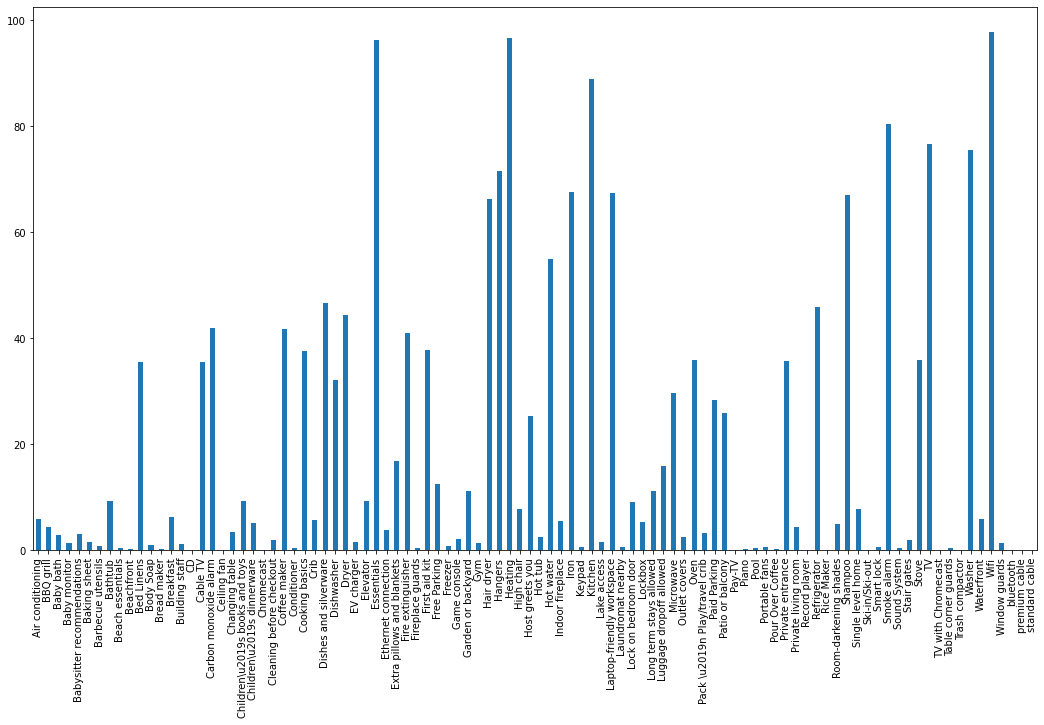

In [94]:
fig = plt.figure(figsize=(18,10))
dummies_dist.plot.bar()

In [95]:
print(dummies_dist)

Air conditioning                   5.947183
BBQ grill                          4.387179
Baby bath                          2.923011
Baby monitor                       1.394953
Babysitter recommendations         3.029496
Baking sheet                       1.623895
Barbecue utensils                  0.772016
Bathtub                            9.285486
Beach essentials                   0.415291
Beachfront                         0.223618
Bed Linens                        35.518049
Body Soap                          0.921095
Bread maker                        0.239591
Breakfast                          6.197423
Building staff                     1.213928
CD                                 0.005324
Cable TV                          35.571292
Carbon monoxide alarm             41.837930
Ceiling fan                        0.021297
Changing table                     3.498030
Children\u2019s books and toys     9.237568
Children\u2019s dinnerware         5.111277
Chromecast                      

**price**

In [96]:
def price_mod(a): #where a is a string
    if '$' in a:
      a = a.translate({ord('$'): None})
      a = int(float(a.replace(',','')))
    return a

In [97]:
listings['price'] = listings['price'].swifter.apply(price_mod)

In [98]:
listings['price'].isna().sum()

0

**minimum_nights/maximum_nights**

In [99]:
listings.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59,3,1125,1,0,0,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.98,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,236,1,365,1,0,0,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.63,3966.0,house,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125,14,180,1,0,0,4,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.15,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,138,2,730,1,21,51,75,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.05,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,75,2,1825,1,28

In [100]:
listings[['minimum_nights','maximum_nights']].isna().sum()

minimum_nights    0
maximum_nights    0
dtype: int64

**has_availability / availability_30 /	availability_60 /	availability_90 /	availability_365**


In [101]:
availability = listings.loc[:,'availability_30':'availability_365']

In [102]:
availability.isna().sum()

availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

In [103]:
availability.describe()

,availability_30,availability_60,availability_90,availability_365
count,18782.000000,18782.000000,18782.000000,18782.000000
mean,4.896550,10.226919,15.712597,53.631935
std,10.092918,20.762204,30.895285,107.401414
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,7.000000,41.000000
max,30.000000,60.000000,90.000000,365.000000


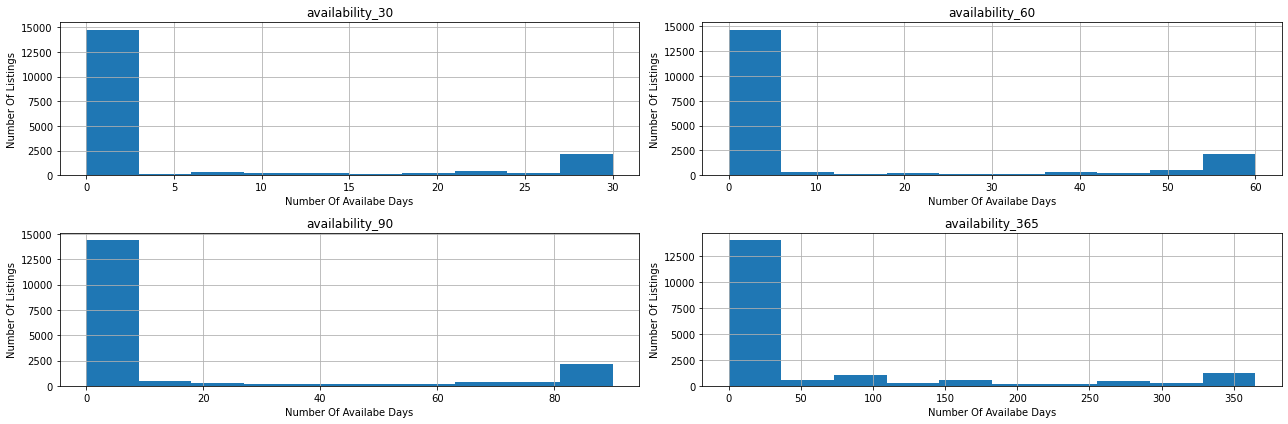

In [104]:
ax = listings.loc[:,'availability_30':'availability_365'].hist(figsize=[18,6])
for i in range(2):
  for j in range(2):
      ax[i][j].set_xlabel("Number Of Availabe Days")
      ax[i][j].set_ylabel("Number Of Listings")

plt.tight_layout()

In [105]:
listings.loc[:,'availability_30':'availability_365'].corr()

,availability_30,availability_60,availability_90,availability_365
availability_30,1.000000,0.979866,0.956807,0.718372
availability_60,0.979866,1.000000,0.989238,0.746508
availability_90,0.956807,0.989238,1.000000,0.775134
availability_365,0.718372,0.746508,0.775134,1.000000


In [106]:
listings.drop(columns=['availability_60','availability_90'],axis=1,inplace=True)

**Reviews**

In [107]:
listings.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59,3,1125,1,0,0,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.98,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,236,1,365,1,0,0,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.63,3966.0,house,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125,14,180,1,0,58,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.15,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,138,2,730,1,21,158,219,16,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.05,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,75,2,1825,1,28,340,336,32,2,2010-08-22,2020-09-20,97.0,10.0,10.0

In [108]:
listings.loc[:,'number_of_reviews':'review_scores_value'].isna().sum()

number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
first_review                   2290
last_review                    2290
review_scores_rating           2542
review_scores_accuracy         2553
review_scores_cleanliness      2552
review_scores_checkin          2561
review_scores_communication    2553
review_scores_location         2559
review_scores_value            2559
dtype: int64

In [109]:
reviews_null_values = listings.loc[:,'number_of_reviews':'review_scores_value'].isna().mean()*100
for col in listings.columns[20:31]:
  print('Null values in {} is: {}%'.format(col,round(100*listings[col].isna().sum()/len(listings),1)))

Null values in number_of_reviews_ltm is: 0.0%
Null values in number_of_reviews_l30d is: 0.0%
Null values in first_review is: 12.2%
Null values in last_review is: 12.2%
Null values in review_scores_rating is: 13.5%
Null values in review_scores_accuracy is: 13.6%
Null values in review_scores_cleanliness is: 13.6%
Null values in review_scores_checkin is: 13.6%
Null values in review_scores_communication is: 13.6%
Null values in review_scores_location is: 13.6%
Null values in review_scores_value is: 13.6%


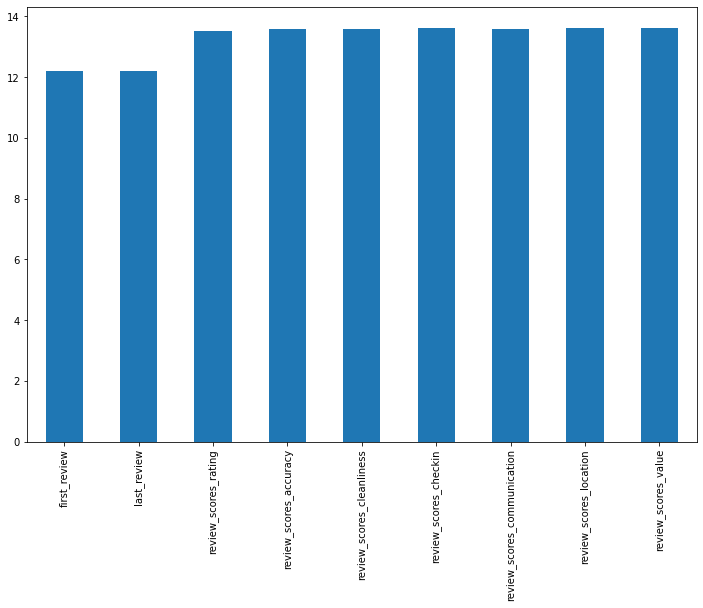

In [110]:
fig = plt.figure(figsize=(12,8))
reviews_null_values[reviews_null_values>0].plot.bar()

In [111]:
listings.loc[:,'number_of_reviews':'review_scores_value'].corr()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
number_of_reviews,1.000000,0.631598,0.270716,0.012628,0.055709,0.055988,0.073460,0.045377,0.090766,0.024424
number_of_reviews_ltm,0.631598,1.000000,0.510946,-0.000526,0.017550,0.027153,0.035223,0.003258,0.088355,0.013352
number_of_reviews_l30d,0.270716,0.510946,1.000000,-0.007916,-0.009830,0.007197,0.008157,-0.009365,0.045662,0.006388
review_scores_rating,0.012628,-0.000526,-0.007916,1.000000,0.714320,0.681657,0.574393,0.635034,0.366201,0.686441
review_scores_accuracy,0.055709,0.017550,-0.009830,0.714320,1.000000,0.558465,0.512090,0.564360,0.316379,0.563945
review_scores_cleanliness,0.055988,0.027153,0.007197,0.681657,0.558465,1.000000,0.412540,0.443146,0.256149,0.543481
review_scores_checkin,0.073460,0.035223,0.008157,0.574393,0.512090,0.412540,1.000000,0.646665,0.301403,0.452542
review_scores_communication,0.045377,0.003258,-0.009365,0.635034,0.564360,0.443146,0.646665,1.000000,0.311579,0.502960
review_scores_location,0.090766,0.088355,0.045662,0.366201,0.316379,0.256149,0.301403,0.311579,1.000000,0.377054
review_scores_value,0.024424,0.013352,0.006388,0.686441,0.563945,0.543481,0.452542,0.502960,0.377054,1.000000


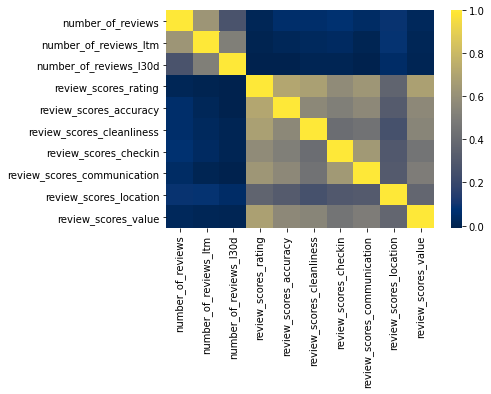

In [112]:
sns.heatmap(data=listings.loc[:,'number_of_reviews':'review_scores_value'].corr(),cmap='cividis')

In [113]:
listings.drop(columns=['number_of_reviews_ltm','number_of_reviews_l30d'], axis=1,inplace=True) # perhaps no?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea3f656250>,
      dtype=object)

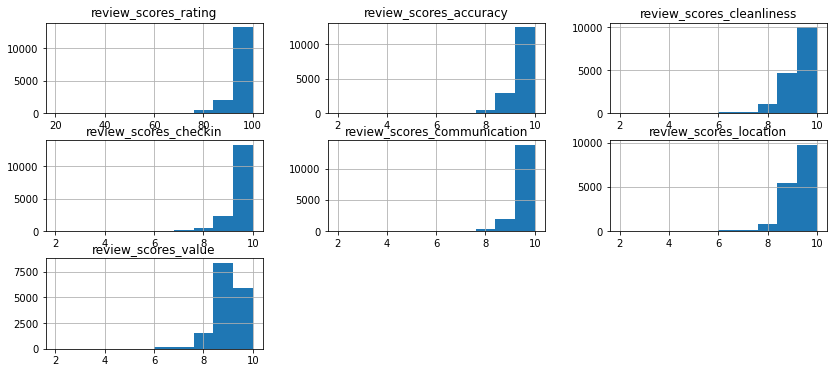

In [114]:
listings.loc[:,'review_scores_rating':'review_scores_value'].hist(figsize=[14,6])

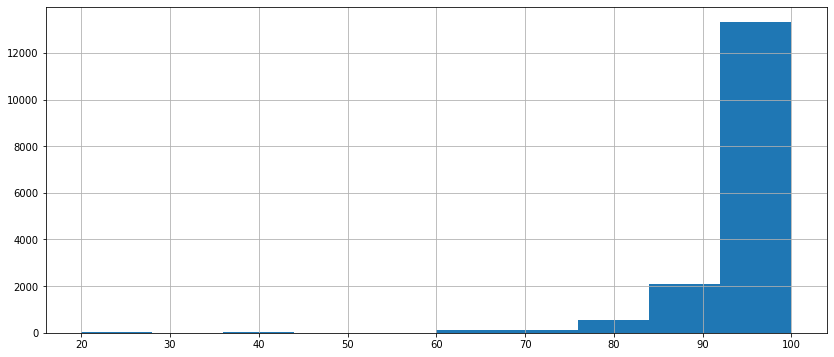

In [115]:
listings.loc[:,'review_scores_rating'].hist(figsize=[14,6])

In [116]:
listings['last_review'].isna().sum()

2290

In [117]:
listings['last_review'] = pd.to_datetime(listings['last_review'])

In [118]:
listings['last_review'].describe()

count                   16492
unique                   1728
top       2020-01-02 00:00:00
freq                      277
first     2012-07-26 00:00:00
last      2020-10-12 00:00:00
Name: last_review, dtype: object

In [119]:
listings['time_since_last_review'] = (listings['last_scraped'] - listings['last_review']).astype('timedelta64[D]')

In [120]:
listings['time_since_last_review'].fillna(value='no_reviews',inplace=True)

In [121]:
def bin_column(x):
  if type(x) == str:
    x = 'no_reviews'
  elif type(x) == float:
    y = int(x)
    if y in range(0,182):
      y = '0-6 months'
    elif y in range(182,365):
      y = '6-12 months'
    elif y in range(365,730):
      y = '1-2 years'
    elif y in range(730,1460):
      y = '2-3 years'
    else:
      y = '4+ years'
    return y
  return x

In [122]:
listings['time_since_last_review'] = listings['time_since_last_review'].swifter.apply(bin_column)

In [123]:
listings['time_since_last_review'].value_counts()

6-12 months    4665
1-2 years      4068
2-3 years      3594
0-6 months     3030
no_reviews     2290
4+ years       1135
Name: time_since_last_review, dtype: int64

In [124]:
listings.drop(columns=['first_review','last_review'],axis=1,inplace=True) # dropping the columns 'first_review' and 'last_review'

In [125]:
listings['review_scores_rating'].dtype

dtype('float64')

In [126]:
columns = ['review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location','review_scores_value']

In [127]:
for col in columns:
  listings[col].fillna(value='no_reviews',inplace = True)
  print(listings[col].isna().sum())

0
0
0
0
0
0


In [128]:
  listings['review_scores_rating'].fillna(value='no_reviews',inplace = True)
  print(listings['review_scores_rating'].isna().sum())

0


In [129]:
listings.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable,time_since_last_review
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59,3,1125,1,0,0,278,98,10,10,10,10,9,10,1,1,0,1,0,1.98,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,6-12 months
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,236,1,365,1,0,0,340,89,10,10,10,10,10,9,1,2,0,2,0,2.63,3966.0,house,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,6-12 months
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125,14,180,1,0,58,5,100,10,10,10,10,10,10,0,1,1,0,0,0.15,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,6-12 months
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,138,2,730,1,21,158,219,99,10,10,10,10,10,10,1,1,0,1,0,2.05,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0-6 months
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,75,2,1825,1,28,340,336,97,10,10,10,10,10,10,0,2,0,2,0,2.72,3803.0,apartment,1.0,shared,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [130]:
listings.drop(list(columns),axis=1,inplace=True)

In [131]:
listings.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable,time_since_last_review
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59,3,1125,1,0,0,278,98,1,1,0,1,0,1.98,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,6-12 months
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,236,1,365,1,0,0,340,89,1,2,0,2,0,2.63,3966.0,house,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,6-12 months
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125,14,180,1,0,58,5,100,0,1,1,0,0,0.15,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,6-12 months
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,138,2,730,1,21,158,219,99,1,1,0,1,0,2.05,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0-6 months
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,75,2,1825,1,28,340,336,97,0,2,0,2,0,2.72,3803.0,apartment,1.0,shared,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0-6 months


In [132]:
listings['review_scores_rating'].value_counts()

100.0         4840
no_reviews    2542
98.0          1695
97.0          1375
96.0          1272
95.0          1041
99.0          1012
93.0           971
90.0           713
94.0           666
92.0           445
91.0           416
80.0           394
87.0           236
89.0           201
88.0           199
85.0           140
86.0           107
60.0            93
84.0            85
83.0            73
70.0            42
82.0            35
73.0            28
81.0            22
40.0            21
20.0            19
75.0            19
77.0            13
76.0            10
67.0             9
78.0             8
71.0             5
50.0             5
65.0             5
72.0             4
66.0             4
74.0             3
68.0             2
57.0             2
64.0             1
56.0             1
55.0             1
53.0             1
69.0             1
48.0             1
47.0             1
79.0             1
32.0             1
63.0             1
Name: review_scores_rating, dtype: int64

In [133]:
def reviews_enc(c):
  if type(c) == str:
    c = 'no_reviews'
  elif type(c) == float:
    z = int(c)
    if z in range(0,20):
      z = '1-star'
    elif z in range(20,40):
      z = '2-stars'
    elif z in range(40,60):
      z = '3-stars'
    elif z in range(60,80):
      z = '4-stars'
    elif z in range(80,101):
      z = '5-stars'
    return z
  return c

In [134]:
listings['review_scores_rating'] = listings['review_scores_rating'].swifter.apply(reviews_enc)

In [135]:
listings['review_scores_rating'].value_counts()

5-stars       15938
no_reviews     2542
4-stars         249
3-stars          33
2-stars          20
Name: review_scores_rating, dtype: int64

In [136]:
listings['review_scores_rating'].isna().sum()

0

In [137]:
listings.drop('reviews_per_month',axis=1,inplace=True)

**host_listings_count/calculated_host_listings_count_entire_homes/calculated_host_listings_count_private_rooms/	calculated_host_listings_count_shared_rooms**

In [139]:
listings.loc[listings['host_listings_count'].isna(), ['host_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms']]

,host_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms
226,NaN,52,52,0,0
746,NaN,52,52,0,0
966,NaN,52,52,0,0
1496,NaN,52,52,0,0
1815,NaN,52,52,0,0
2167,NaN,52,52,0,0
2652,NaN,52,52,0,0
2901,NaN,1,1,0,0
3532,NaN,52,52,0,0
3962,NaN,52,52,0,0


In [140]:
listings['host_listings_count'].value_counts()

1.0      12792
2.0       2324
0.0       1659
3.0        646
4.0        236
5.0        153
100.0       86
6.0         82
85.0        81
7.0         70
8.0         65
10.0        45
9.0         42
13.0        40
41.0        39
20.0        38
16.0        35
11.0        34
17.0        31
40.0        31
12.0        28
15.0        28
18.0        21
21.0        20
19.0        20
35.0        18
22.0        17
27.0         9
36.0         7
28.0         6
60.0         6
30.0         5
88.0         4
54.0         2
581.0        2
23.0         2
892.0        1
31.0         1
Name: host_listings_count, dtype: int64

In [141]:
listings.corr()

,id,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_active_for(days),bathrooms_number,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed Linens,Body Soap,Bread maker,Breakfast,Building staff,CD,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Chromecast,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free Parking,Freezer,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Pay-TV,Piano,Pool,Portable fans,Pour Over Coffee,Private entrance,Private living room,Record player,Refrigerator,Rice Maker,Room-darkening shades,Shampoo,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Sound System,Stair gates,Stove,TV,TV with Chromecast,Table corner guards,Trash compactor,Washer,Waterfront,Wifi,Window guards,bluetooth,premium cable,standard cable
id,1.000000,0.006707,0.058483,-0.039622,0.010859,0.022593,-0.010112,-0.022870,-0.024369,0.009551,-0.036066,0.028015,NaN,0.122341,0.029094,-0.280451,0.255570,0.082499,0.058167,0.126136,0.069432,-0.475365,0.050076,0.081884,-0.016446,-0.041444,-0.030980,-0.043332,0.074640,0.042842,-0.023279,0.000584,0.013203,0.046792,0.061771,0.039702,0.043044,0.016821,-0.009548,-0.360018,0.003429,0.007904,-0.044021,-0.103737,-0.066129,0.014243,0.034179,0.030138,0.044226,0.017323,-0.070990,0.045947,0.028151,-0.042369,0.015604,0.009232,0.048693,0.001711,0.011984,-0.034286,-0.007627,-0.033816,0.050222,0.056437,-0.000739,0.008382,0.035558,0.074718,0.104250,-0.072085,-0.090400,-0.133401,-0.038571,0.064271,-0.037421,0.039929,-0.014302,-0.120250,0.007005,0.000273,0.013150,0.108552,0.009644,0.005553,-0.046257,0.016552,-0.022213,0.023351,-0.064729,-0.070552,0.014549,-0.000194,0.030580,0.013552,0.029070,0.015680,0.307845,0.113942,0.000115,0.052460,0.006771,-0.022178,0.016714,0.023335,0.005850,0.018495,-0.004925,0.027208,-0.038734,0.022221,-0.061671,-0.002782,-0.017365,0.014756,-0.093728,0.023029,-0.013302,-0.024326,-0.009548,0.012186,-0.011034
host_is_superhost,0.006707,1.000000,-0.024910,0.113287,0.037559,0.026439,-0.015815,-0.056831,-0.006903,-0.029290,-0.010892,-0.029556,NaN,0.180369,0.170213,0.366130,0.079935,-0.034856,-0.054814,0.086909,0.002711,0.001312,0.037102,0.067423,0.014454,0.002566,-0.007779,0.036184,0.030894,0.016163,0.005380,0.022428,0.000807,0.194824,0.045872,0.002646,0.044661,0.051988,-0.002907,0.016092,0.127291,0.004797,-0.019388,-0.000900,0.004561,-0.002907,0.029162,0.251863,0.029713,0.147439,0.033972,0.239297,0.089110,-0.031977,0.050064,-0.006006,0.060994,0.076426,0.196316,0.130656,0.004852,0.116822,0.020231,0.024960,0.008924,0.061737,-0.007091,0.148997,0.131172,0.038546,0.022094,0.128875,-0.006419,0.235787,0.007605,0.068995,0.051224,-0.209103,0.075097,0.085075,0.045844,0.229032,0.114833,0.144419,0.208989,0.160671,-0.003161,0.110227,0.060596,0.160103,0.125984,0.011813,-0.002856,0.010808,0.058986,0.023770,0.065023,0.134369,0.016374,0.247339,0.000466,0.042185,0.128079,0.093068,0.021974,0.087143,0.083942,0.027751,-0.008161,0.113453,-0.064403,0.026020,-0.001332,-0.006502,-0.123213,0.150052,0.037274,-0.007074

In [142]:
for i in ['calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms']:
  print(listings[listings['host_listings_count']==listings[i]].shape[0])

14671
11955
1670
3749


In [143]:
listings["host_listings_count"].fillna(listings["calculated_host_listings_count"], inplace=True)

In [144]:
listings['host_listings_count'].isna().sum()

0

In [145]:
listings.drop(columns=['calculated_host_listings_count'],axis=1,inplace=True)

**Beds**

In [146]:
listings.loc[listings['beds'].isna(),['bedrooms','beds','property_type','room_type']]

,bedrooms,beds,property_type,room_type
3319,1.0,NaN,Private room in apartment,Private room
7959,1.0,NaN,Private room in apartment,Private room
8174,1.0,NaN,Private room in apartment,Private room
8671,NaN,NaN,Private room in apartment,Private room
13599,1.0,NaN,Entire apartment,Entire home/apt
14914,1.0,NaN,Entire apartment,Entire home/apt
16467,1.0,NaN,Room in boutique hotel,Hotel room
16790,1.0,NaN,Room in boutique hotel,Hotel room
16791,1.0,NaN,Room in boutique hotel,Hotel room
16792,1.0,NaN,Room in boutique hotel,Hotel room


In [147]:
simple_imp = SimpleImputer(strategy="most_frequent")
listings['beds'] = simple_imp.fit_transform(np.array(listings['beds']).reshape(-1,1))

In [148]:
listings['beds'].isna().sum()

0

In [149]:
listings['beds'].shape

(18782,)

**Bedrooms**

In [150]:
listings.loc[listings['bedrooms'].isna(),['bedrooms','beds','property_type','room_type']]

,bedrooms,beds,property_type,room_type
43,NaN,2.0,Entire guesthouse,Entire home/apt
45,NaN,1.0,Entire apartment,Entire home/apt
115,NaN,1.0,Entire apartment,Entire home/apt
183,NaN,1.0,Private room in apartment,Private room
216,NaN,1.0,Entire apartment,Entire home/apt
255,NaN,1.0,Private room in bed and breakfast,Private room
265,NaN,1.0,Private room in bed and breakfast,Private room
271,NaN,4.0,Entire loft,Entire home/apt
455,NaN,2.0,Private room in bed and breakfast,Private room
487,NaN,1.0,Entire condominium,Entire home/apt


In [151]:
listings['bedrooms'].value_counts()

1.0     11255
2.0      4444
3.0      1529
4.0       460
5.0        69
6.0        14
12.0        6
10.0        5
8.0         5
7.0         4
30.0        1
14.0        1
9.0         1
Name: bedrooms, dtype: int64

In [152]:
listings.groupby(['beds','accommodates'])['bedrooms'].transform('median')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
18777    2.0
18778    1.0
18779    1.0
18780    1.0
18781    1.0
Name: bedrooms, Length: 18782, dtype: float64

In [153]:
corr = listings.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [154]:
listings['bedrooms'].fillna(listings.groupby(['beds','accommodates']).bedrooms.transform('median'),inplace=True)

In [155]:
listings['bedrooms'].isna().sum()

0

In [156]:
listings['bedrooms'].value_counts()

1.0     12108
2.0      4564
3.0      1542
4.0       460
5.0        70
6.0        14
12.0        6
10.0        5
8.0         5
7.0         4
30.0        1
14.0        1
9.0         1
1.5         1
Name: bedrooms, dtype: int64

In [157]:
listings.isna().sum()

id                                              0
last_scraped                                    0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_30                                 0
availability_365                                0
number_of_reviews                               0


In [158]:
dataset = listings.drop(list(dummies_dist[dummies_dist<1.0].index),axis=1)

In [159]:
dataset.head()

,id,last_scraped,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bathtub,Bed Linens,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,First aid kit,Free Parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Single level home,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,time_since_last_review
0,2818,2020-10-11,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59,3,1125,1,0,0,278,5-stars,1,0,1,0,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,6-12 months
1,20168,2020-10-11,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room in townhouse,Private room,2,1.0,1.0,236,1,365,1,0,0,340,5-stars,1,0,2,0,3966.0,house,1.0,private,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,6-12 months
2,25428,2020-10-11,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125,14,180,1,0,58,5,5-stars,0,1,0,0,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,6-12 months
3,27886,2020-10-10,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,138,2,730,1,21,158,219,5-stars,1,0,1,0,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,0-6 months
4,28871,2020-10-10,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room in apartment,Private room,2,1.0,1.0,75,2,1825,1,28,340,336,5-stars,0,0,2,0,3803.0,apartment,1.0,shared,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0-6 months


In [160]:
dataset.shape

(18782, 99)

In [161]:
dataset.drop(['last_scraped','property_type'],axis=1,inplace=True)

In [162]:
dataset.columns.get_loc('Air conditioning')

27

In [163]:
dataset.iloc[:,:3].columns

Index(['id', 'host_is_superhost', 'host_listings_count'], dtype='object')

In [164]:
dataset.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bathtub,Bed Linens,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,First aid kit,Free Parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Single level home,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,time_since_last_review
0,2818,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,2,1.0,2.0,59,3,1125,1,0,0,278,5-stars,1,0,1,0,4400.0,apartment,1.5,shared,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,6-12 months
1,20168,0.0,2.0,1.0,Centrum,52.36424,4.89396,Private room,2,1.0,1.0,236,1,365,1,0,0,340,5-stars,1,0,2,0,3966.0,house,1.0,private,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,6-12 months
2,25428,1.0,2.0,0.0,Centrum,52.37297,4.88339,Entire home/apt,3,1.0,1.0,125,14,180,1,0,58,5,5-stars,0,1,0,0,3978.0,apartment,1.0,private,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,6-12 months
3,27886,1.0,1.0,1.0,Centrum,52.38761,4.89188,Private room,2,1.0,1.0,138,2,730,1,21,158,219,5-stars,1,0,1,0,3854.0,boat,1.5,private,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,0-6 months
4,28871,1.0,2.0,1.0,Centrum,52.36719,4.89092,Private room,2,1.0,1.0,75,2,1825,1,28,340,336,5-stars,0,0,2,0,3803.0,apartment,1.0,shared,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0-6 months


In [165]:
dataset['id'].dtype

dtype('int64')

## Downcast our data type in order to minimize csv's size of saving.

In [166]:
m = list(dataset.columns)
n = [x for x in m if x not in ['latitude', 'longitude', 'bathrooms_number','neighbourhood_cleansed','room_type','property_encoded','bathrooms_type','id']]

In [167]:
dataset1 = dataset

In [168]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 97 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18782 non-null  int64  
 1   host_is_superhost                             18782 non-null  float64
 2   host_listings_count                           18782 non-null  float64
 3   host_identity_verified                        18782 non-null  float64
 4   neighbourhood_cleansed                        18782 non-null  object 
 5   latitude                                      18782 non-null  float64
 6   longitude                                     18782 non-null  float64
 7   room_type                                     18782 non-null  object 
 8   accommodates                                  18782 non-null  int64  
 9   bedrooms                                      18782 non-null 

In [169]:
for i in n:
  if dataset1[i].dtype == 'object':
    continue
  if dataset1[i].dtype == 'int64':
    dataset1[i]=pd.to_numeric(dataset1[i],downcast='unsigned')
  else:
    dataset1[i] = dataset1[i].apply(lambda x: int(x))
    dataset1[i]=pd.to_numeric(dataset1[i],downcast='unsigned')

In [170]:
for i in n:
  print(i,dataset1[i].dtype)

host_is_superhost uint8
host_listings_count uint16
host_identity_verified uint8
accommodates uint8
bedrooms uint8
beds uint8
price uint16
minimum_nights uint16
maximum_nights uint16
has_availability uint8
availability_30 uint8
availability_365 uint16
number_of_reviews uint16
review_scores_rating object
instant_bookable uint8
calculated_host_listings_count_entire_homes uint8
calculated_host_listings_count_private_rooms uint8
calculated_host_listings_count_shared_rooms uint8
host_active_for(days) uint16
Air conditioning uint8
BBQ grill uint8
Baby bath uint8
Baby monitor uint8
Babysitter recommendations uint8
Baking sheet uint8
Bathtub uint8
Bed Linens uint8
Breakfast uint8
Building staff uint8
Cable TV uint8
Carbon monoxide alarm uint8
Changing table uint8
Children\u2019s books and toys uint8
Children\u2019s dinnerware uint8
Cleaning before checkout uint8
Coffee maker uint8
Cooking basics uint8
Crib uint8
Dishes and silverware uint8
Dishwasher uint8
Dryer uint8
EV charger uint8
Elevator 

In [171]:
dataset1['bathrooms_number']=dataset1['bathrooms_number'].astype('float16')

In [172]:
print(dataset1['bathrooms_number'].dtype)

float16


In [173]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 97 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18782 non-null  int64  
 1   host_is_superhost                             18782 non-null  uint8  
 2   host_listings_count                           18782 non-null  uint16 
 3   host_identity_verified                        18782 non-null  uint8  
 4   neighbourhood_cleansed                        18782 non-null  object 
 5   latitude                                      18782 non-null  float64
 6   longitude                                     18782 non-null  float64
 7   room_type                                     18782 non-null  object 
 8   accommodates                                  18782 non-null  uint8  
 9   bedrooms                                      18782 non-null 

In [174]:
for i in dataset1.columns:
  print(i,dataset1[i].dtype)

id int64
host_is_superhost uint8
host_listings_count uint16
host_identity_verified uint8
neighbourhood_cleansed object
latitude float64
longitude float64
room_type object
accommodates uint8
bedrooms uint8
beds uint8
price uint16
minimum_nights uint16
maximum_nights uint16
has_availability uint8
availability_30 uint8
availability_365 uint16
number_of_reviews uint16
review_scores_rating object
instant_bookable uint8
calculated_host_listings_count_entire_homes uint8
calculated_host_listings_count_private_rooms uint8
calculated_host_listings_count_shared_rooms uint8
host_active_for(days) uint16
property_encoded object
bathrooms_number float16
bathrooms_type object
Air conditioning uint8
BBQ grill uint8
Baby bath uint8
Baby monitor uint8
Babysitter recommendations uint8
Baking sheet uint8
Bathtub uint8
Bed Linens uint8
Breakfast uint8
Building staff uint8
Cable TV uint8
Carbon monoxide alarm uint8
Changing table uint8
Children\u2019s books and toys uint8
Children\u2019s dinnerware uint8
Cle

In [175]:
dataset1.isna().sum()

id                                              0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
review_scores_rating                            0
instant_bookable                                0


In [176]:
dataset1.to_csv(r'/content/drive/MyDrive/Code.Hub_Data_Science /Team2_Project/MLDataset.csv', index = False)